## Explanatory analysis of Ford GoBike System for greater San Francisco Bay area
### by Adegbite paul Adekunle

### Dataset overview
##### This data set is a cleaned dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

After cleaning The original dataset it now contains 17 features and 174952 bike trips in 2019 in the greater san fransisco area,The features in the dataset can be grouped into:

duration: containing (duration_sec,end_time)
station information: containing (start_station_latitude,start_station_longitude,start_station_id,end_station_id,end_station_name,start_station_name,end_station_latitude,end_station_longitude)
user information: contining(bike_id,member_gender,user_type,bike_share_for_all_trip)
some new features: hour,member_age,dayofweek

#### I'm interested in exploring the duration features and how it relates to features like hour of day,dayofweek and how these features relate to users in terms of their gender,agealso what gender takes bike the most.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##### The cleaned dataset will now be imported 

In [58]:
data = pd.read_csv('201902-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [59]:
data_copy = data.copy()

In [60]:
data_copy.dropna(inplace = True)

In [61]:
#a function that convert start_time and end_time to datetime datatype
data_copy['start_time'] = pd.to_datetime(data_copy['start_time'])
data_copy['end_time'] = pd.to_datetime(data_copy['end_time'])

In [62]:
#convert start_station_id and end_station_id to integer datatype
data_copy['start_station_id'] = data_copy['start_station_id'].astype('object')
data_copy['end_station_id'] = data_copy['end_station_id'].astype('object')
data_copy['bike_id'] = data_copy['bike_id'].astype('object')

In [63]:
#convert user_type,member_gender,bike_share_for_all_trip to categorical types
#user_type
print(data_copy.user_type.unique())
data_copy.user_type = data_copy.user_type.astype('category')

['Customer' 'Subscriber']


In [64]:
#member_gender
print(data_copy.member_gender.unique())
data_copy.member_gender = data_copy.member_gender.astype('category')

['Male' 'Other' 'Female']


In [65]:
#bike_share_for_all_trip
print(data_copy.bike_share_for_all_trip.unique())
data_copy.bike_share_for_all_trip = data_copy.bike_share_for_all_trip.astype('category')

['No' 'Yes']


In [66]:
#generate hour
data_copy['hour'] = data_copy['start_time'].apply(lambda x:x.hour)
#make the hour feature into an ordinal categorical type
hour = data_copy['hour'].unique().tolist()
hour.sort()
#this snippet of code is from our lessons
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    h_class = pd.api.types.CategoricalDtype(ordered = True, categories = hour)
    data_copy['hour'] = data_copy['hour'].astype(h_class)
else: # pre-v0.21
    data_copy['hour'] = data_copy['hour'].astype('category', ordered = True,categories = hour)
data_copy['hour'].unique()

[17, 12, 23, 22, 21, ..., 6, 4, 3, 2, 1]
Length: 24
Categories (24, int64): [0 < 1 < 2 < 3 ... 20 < 21 < 22 < 23]

In [67]:
#generate day-of-week
data_copy['dayOfWeek'] = data_copy.start_time.dt.day_name().astype('str')
#make dayOfWeek into an ordinal categorical datatype
day = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
#this snippet of code is from our lessons
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    d_class = pd.api.types.CategoricalDtype(ordered = True, categories = day)
    data_copy['dayOfWeek'] = data_copy['dayOfWeek'].astype(d_class)
else: # pre-v0.21
    data_copy['dayOfWeek'] = data_copy['dayOfWeek'].astype('category', ordered = True,categories = day)
data_copy['dayOfWeek'].unique()

['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday']
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [68]:
# convert member_birth_year to integer datatype and generate member ages from this column
data_copy['member_birth_year'] = data_copy['member_birth_year'].astype('int')
data_copy['member_age'] = 2022 - data_copy['member_birth_year']

In [69]:
#then some columns can now be dropped
def drop_col_rows(data,col_row,axis = None):
    data.drop(col_row,axis = axis,inplace = True)
    return 'column or row passed have been dropped'
col = ['start_time','member_birth_year']
drop_col_rows(data_copy,col,axis = 1)

'column or row passed have been dropped'

In [70]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  object        
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  object        
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  object        
 11  user_type                174952 non-null  category      
 12  member_gender   

In [71]:
def titler(x_label,y_label,title):
    plt.xlabel(x_label,fontdict = {'size':12,'weight':'bold'})
    plt.ylabel(y_label,fontdict = {'size':12,'weight':'bold'})
    plt.title(title,fontdict = {'size':12,'weight':'bold'})
color = sns.color_palette()[0]

### The male gender mostly used this service with 74.59 percentage

In [72]:
mem_gen_frq = data_copy.member_gender.value_counts()
ord_frq = mem_gen_frq.index
mem_gen_frq

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

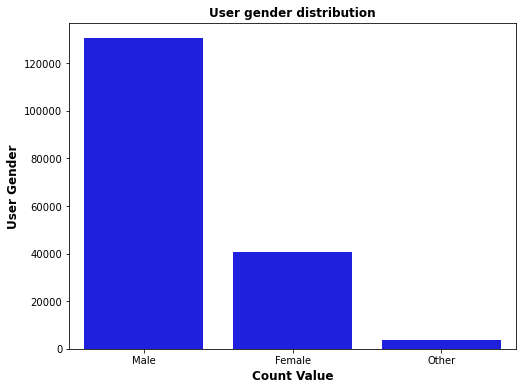

In [73]:
plt.figure(figsize = (8,6))
sns.countplot(data=data_copy,x = 'member_gender',order=ord_frq,color = 'blue')
plt.xlabel('Count Value',fontdict = {'size':12,'weight':'bold'})
plt.ylabel('User Gender',fontdict = {'size':12,'weight':'bold'})
plt.title('User gender distribution',fontdict = {'size':12,'weight':'bold'});

### The service is uses mostly on thursday for days of week, the most frequent hour of use is 5pm(17)

In [74]:
h_counts = data_copy['hour'].value_counts(sort = False)
ord_h_freq = h_counts.index

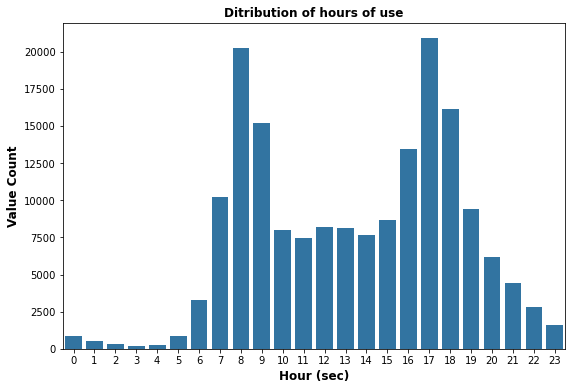

In [75]:
plt.figure(figsize = (9,6))
sns.countplot(data = data_copy,x = 'hour',order=ord_h_freq,color = color)
titler('Hour (sec)','Value Count','Ditribution of hours of use')
plt.show()

In [78]:
d_counts = data_copy['dayOfWeek'].value_counts(sort = False)
ord_d_freq = d_counts.index
d_counts

Sunday       14512
Monday       25641
Tuesday      30584
Wednesday    28426
Thursday     33712
Friday       27663
Saturday     14414
Name: dayOfWeek, dtype: int64

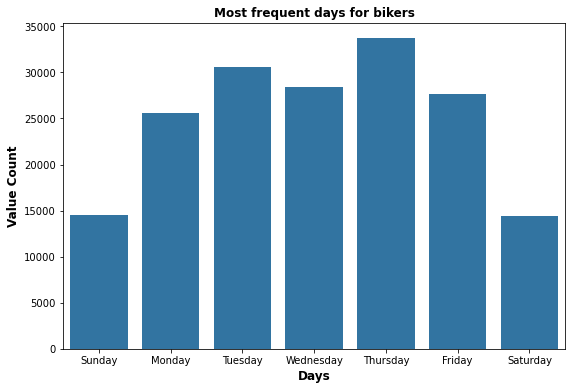

In [79]:
plt.figure(figsize = (9,6))
sns.countplot(data = data_copy,x = 'dayOfWeek',order=ord_d_freq,color = sns.color_palette()[0])
plt.xlabel('Days',fontdict = dict(size = 12,weight = 'bold'))
plt.ylabel('Value Count',fontdict = dict(size = 12,weight = 'bold'))
plt.title('Most frequent days for bikers',fontdict = dict(size = 12,weight = 'bold'))
plt.show()

#### Some categorical exploration shows that:
- weekdays are the busiest between 7 am and 8pm but there isn't much trips between 10 am and 3 pm wihch should be work hours ideally.
- on weekends,it is busy between 11pm and 2am
- across all week days and hours,subscribers have higher trips than customers
- Bikers who do not use bike sharer for all trips engage in more trips acrross all hours of day and days of week compared to bikers that do.
- No customers have used bike share for all trips while some Subscribers use bike share for trips.
- Male bikers have more trips compared to female bikers across all hours of the day and all days of the week
- Bikers who do not specify their gender is a very small portion of Customer and subcriber while male bikers carry the mojority for both user type
- Bikers use the service mostly on Thursday for all gender type.
- 8am and 5pm are the hours that bikers of all gender spend most time on trips.

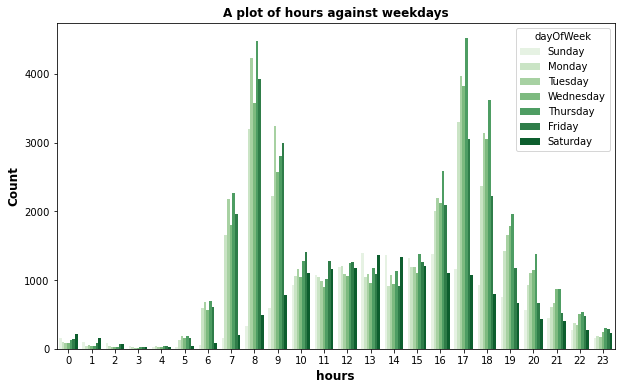

In [80]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'hour',hue = 'dayOfWeek',palette = 'Greens')
titler('hours','Count','A plot of hours against weekdays')
plt.show()

- weekdays are the busiest between 7 am and 8pm but there isn't much trips between 10 am and 3 pm wihch should be work hours ideally.
- on weekends,it is busy between 11pm and 2am
- across all week days and hours,subscribers have higher trips than customers

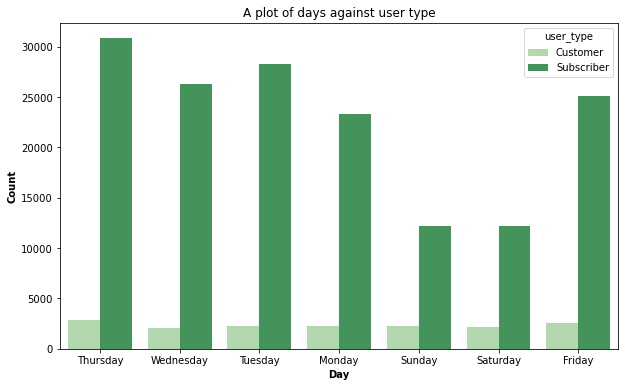

In [34]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'dayOfWeek',hue = 'user_type',palette = 'Greens')
plt.xlabel('Day',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Count',fontdict={'size':10,'weight':'bold'})
plt.title('A plot of days against user type')
plt.show()

#### we can see that Thursday and Tuesday is the most frequent hours for both users (Subscribers and Customer)

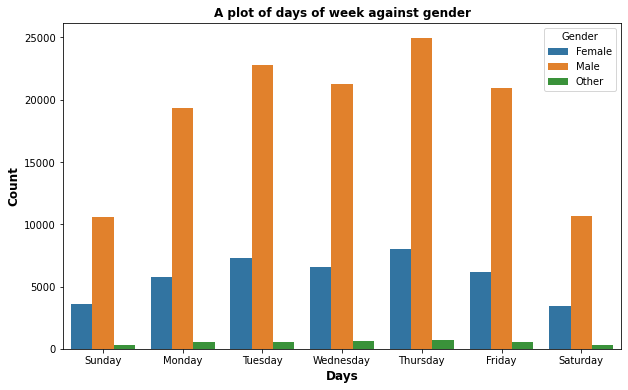

In [81]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'dayOfWeek',hue = 'member_gender')
titler('Days','Count','A plot of days of week against gender')
plt.legend(loc = 'best',title = 'Gender')
plt.show()

#### 6 am and 5 pm is the most frequent hour,male users contributes to the majority of trips

Some of the observation noted during the multivariate explorarion have helped confirms some of the relationship learned from the univariate and bivariate exploration,it was observed that subscribers users do not engage in trips for long compared to customers because they mostly are old and trips are mostly done in workdays(mon -fri) between 5am -8am and 4pm-7pm which perhaps is work resumption time and end of work time.it also appears that for age,middle aged(25 -45) bikers used the service mostly for week ends(mon-fri) between 9am - 6pm and for older bikers between 6am and 5pm.

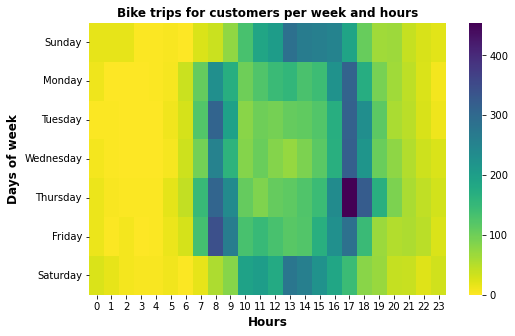

In [89]:
plt.figure(figsize = (8,5))
cust_Type = data_copy.query('user_type == "Customer"')
cust_counts = cust_Type.groupby(['dayOfWeek','hour']).size().reset_index(name = 'name').pivot(index = 'dayOfWeek',columns=['hour'],values = 'name')
sns.heatmap(data=cust_counts,fmt='.0f',cmap = 'viridis_r')
titler('Hours','Days of week','Bike trips for customers per week and hours')
plt.show()

#### For customer users,we can see that the most frequent hour of use is 6 am to 5pm,but for weekends its between 8am and 7pm perhaps becuse users are not using the service to commute to work on weekends

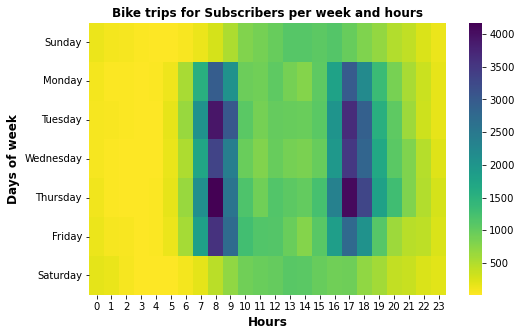

In [90]:
plt.figure(figsize = (8,5))
cust_Type = data_copy.query('user_type == "Subscriber"')
cust_counts = cust_Type.groupby(['dayOfWeek','hour']).size().reset_index(name = 'name').pivot(index = 'dayOfWeek',columns=['hour'],values = 'name')
sns.heatmap(data=cust_counts,fmt='.0f',cmap = 'viridis_r')
titler('Hours','Days of week','Bike trips for Subscribers per week and hours')
plt.show()

#### for subscribers,the most frquent hour of use is 6am to 9 am and 4pm to 7pm which reinforce the thinking that most subscriber users use the service for commuting to work

In [48]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert gobike explanatory.ipynb --to slides --post serve --no-input --no-prompt 

This application is used to convert notebook files (*.ipynb)
        to various other formats.


[NbConvertApp] WARNING | pattern 'gobike' matched no files
[NbConvertApp] WARNING | pattern 'explanatory.ipynb' matched no files




Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cell